In [1]:
import numpy as np
import matplotlib.pyplot as plt

import jlinops

In [2]:
R = jlinops.build_2d_first_order_derivative( (20, 20), boundary="zero" )
A = R.T @ R

In [3]:
A

<400x400 MatrixOperator with dtype=float64>

In [4]:
B = jlinops.build_banded_cholesky_factor(A)

/Users/jonathanlindbloom/opt/miniconda3/envs/speckle38/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:394: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


In [5]:
C = B.A.toarray()

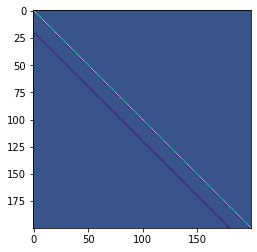

In [6]:
plt.imshow(C[:200,:200])
plt.show()

# Sparse banded matrices

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from jlinops import MatrixOperator, build_1d_first_order_derivative
from scipy.sparse import issparse

### 1. Start with generic SciPy sparse matrix

In [13]:
from scipy.sparse.linalg._interface import MatrixLinearOperator, _CustomLinearOperator
from scipy.sparse.linalg import splu

In [16]:
class SparseMatrixOperator(MatrixOperator):
    """Represents a SciPy sparse matrix.
    """

    def __init__(self, A):

        super().__init__(A)



    def _inv(self):
        """Return the inverse operator.
        """
        return SparseMatrixLUInverseOperator(self)
    
    Inv = property(_inv)



class SparseMatrixLUInverseOperator(_CustomLinearOperator):
    """Represents the inverse operator of a matrix, where an LU factorization is performed.
    """

    def __init__(self, mat_operator):
        
        # Store the original operator
        self.original_op = mat_operator

        # Perform LU decomposition
        self.lu = splu(self.original_op.A)


        # Define matvec and rmatvec
        def _matvec(x):
             return self.lu.solve(x, trans="N")
        
        def _rmatvec(x):
            return self.lu.solve(x, trans="T")

        super().__init__(self.original_op.shape, _matvec, _rmatvec)


In [26]:
R = jlinops.build_2d_first_order_derivative( (20, 20), boundary="zero" )
R = R.A.T @ R.A

In [27]:
Z = SparseMatrixOperator(R)

In [29]:
Zinv = Z.Inv

/Users/jonathanlindbloom/opt/miniconda3/envs/speckle38/lib/python3.8/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:394: SparseEfficiencyWarning: splu converted its input to CSC format
  warn('splu converted its input to CSC format', SparseEfficiencyWarning)


In [30]:
Z.shape

(400, 400)

In [31]:
Zinv @ np.ones(400)

array([  2.18199923,   3.86399846,   5.24364401,   6.41387486,
         7.42554639,   8.30996395,   9.08812759,   9.775019  ,
        10.38181055,  10.91710565,  11.38768468,  11.79897835,
        12.1553812 ,  12.46046628,  12.71713598,  12.92772989,
        13.0941028 ,  13.21768113,  13.29950318,  13.34024682,
         3.86399846,   7.0303506 ,   9.69670274,  11.98630904,
        13.97834673,  15.72618183,  17.2675274 ,  18.63013788,
        19.83511755,  20.89892737,  21.83465473,  22.65284752,
        23.36208015,  23.96934794,  24.48034775,  24.89968078,
        25.23100018,  25.47711853,  25.64008476,  25.72123729,
         5.24364401,   9.69670274,  13.52650729,  16.85631184,
        19.77534967,  22.34888924,  24.62566229,  26.64288757,
        28.42959438,  30.00883157,  31.39915934,  32.61567685,
        33.67074396,  34.57449757,  35.33522631,  35.95964529,
        36.45309863,  36.81970804,  37.06248005,  37.18338029,
         6.41387486,  11.98630904,  16.85631184,  21.13

In [33]:
np.linalg.solve(Z.A.toarray(), np.ones(400))

array([  2.18199923,   3.86399846,   5.24364401,   6.41387486,
         7.42554639,   8.30996395,   9.08812759,   9.775019  ,
        10.38181055,  10.91710565,  11.38768468,  11.79897835,
        12.1553812 ,  12.46046628,  12.71713598,  12.92772989,
        13.0941028 ,  13.21768113,  13.29950318,  13.34024682,
         3.86399846,   7.0303506 ,   9.69670274,  11.98630904,
        13.97834673,  15.72618183,  17.2675274 ,  18.63013788,
        19.83511755,  20.89892737,  21.83465473,  22.65284752,
        23.36208015,  23.96934794,  24.48034775,  24.89968078,
        25.23100018,  25.47711853,  25.64008476,  25.72123729,
         5.24364401,   9.69670274,  13.52650729,  16.85631184,
        19.77534967,  22.34888924,  24.62566229,  26.64288757,
        28.42959438,  30.00883157,  31.39915934,  32.61567685,
        33.67074396,  34.57449757,  35.33522631,  35.95964529,
        36.45309863,  36.81970804,  37.06248005,  37.18338029,
         6.41387486,  11.98630904,  16.85631184,  21.13

# 2.5 Sparse SPD matrix

In [ ]:
from jlinops import banded_cholesky_factorization

In [ ]:
class SparseSPDMatrixOperator(SparseMatrixOperator):
    """Represents a SPD sparse matrix.
    """

    def __init__(self, A):

        super().__init__(A)



    def _inv(self):
        
        return
    

class SparseCholInvSPDMatrixOperator(_CustomLinearOperator):
    """Represents the inverse operator of a sparse SPD matrix,
    computed using the LU decomposition. Also binds Cholesky
    factor as an attribute.
    """

    def __init__(self, mat_operator):

        # Store original operator
        self.original_op = mat_operator

        # Compute cholesky
        self.chol_fac, self.LU = banded_cholesky_factorization(self.original_op.mat)

        # Define matvec and rmatvec
        def _matvec(x):
            return self.LU.solve(x, trans="N")
        
        def _rmatvec(x):
            return self.LU.solve(x, trans="T")
        
        super().__init__(self.original_op.shape, _matvec, _rmatvec)
    


    def _inv(self):
        return self.original_op
    
    Inv = property(_inv)

### 3. Cholesky factor

# Old

In [ ]:
class SparseLowerTriangularMatrixOperator(MatrixOperator):
    """Represents a sparse lower triangular matrix of a SciPy sparse type.
    """

    def __init__(self, A):

        assert issparse(A), "This operator is only meant to represent matrices that are SciPy sparse matrices."

        super().__init__(A)

    def 
    

In [ ]:
t

In [20]:
class SPDBandedMatrixOperator(MatrixOperator):
    """Represents a sparse banded matrix.
    """

    def __init__(self, A):

        assert issparse(A), "This operator is only meant to represent matrices that are SciPy sparse matrices."
        
        super().__init__(A)

    def _solve

In [21]:
R = build_1d_first_order_derivative(5, boundary="zero")

In [27]:
Z = BandedMatrixOperator(R.A) + BandedMatrixOperator(R.A)

In [28]:
Z.shape

(5, 5)

In [32]:
Z @ np.ones((5,1))

<5x1 MatrixOperator with dtype=float64>

In [34]:
type(Z)(R)

<5x5 MatrixOperator with dtype=float64>